# **Ejercicios de pair programming Módulo 2 - Sprint 2**
## **Limpieza III. Outliers**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming para dirigir nuestro análisis.**

### Hipótesis  

1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.  

2. El número de veces que se ha contactado a un cliente en el pasado (campo `campaign`), el número de días que han pasado desde el último contacto (campo `pdays`), y el resultado de la campaña anterior (campo `poutcome`) pueden afectar la respuesta del cliente a una nueva oferta.  

3. Las variables económicas (tales como el índice de precios al consumidor (`cons.price.idx`), la tasa de variación del empleo (`emp.var.rate`), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.  

4. Los clientes que ya tienen una hipoteca (`housing`) o un préstamo (`loan`) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.  

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.  

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?  

In [2]:
# cargamos el dataset
df = pd.read_csv("../datos/bank-additional-full3.csv", index_col = 0)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day_week
0,56,housemaid,married,basic 4y,No,No,No,telephone,261,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"'may', 'mon'",'may','mon'
1,57,services,married,high school,NaN,No,No,telephone,149,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"'may', 'mon'",'may','mon'
2,37,services,married,high school,No,Si,No,telephone,226,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"'may', 'mon'",'may','mon'
3,40,administrator,married,basic 6y,No,No,No,telephone,151,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"'may', 'mon'",'may','mon'
4,56,services,married,high school,No,No,Si,telephone,307,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"'may', 'mon'",'may','mon'


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
"emp,var,rate",41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
"cons,price,idx",41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
"cons,conf,idx",41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


In [4]:
# seleccionamos las variables numércias porque solo puede haber outliers en ellas
df_num = df.select_dtypes(include=np.number)
df_num.head()

,age,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m
0,56,261,1,999,0,1.1,93.994,-36.4,4.857
1,57,149,1,999,0,1.1,93.994,-36.4,4.857
2,37,226,1,999,0,1.1,93.994,-36.4,4.857
3,40,151,1,999,0,1.1,93.994,-36.4,4.857
4,56,307,1,999,0,1.1,93.994,-36.4,4.857


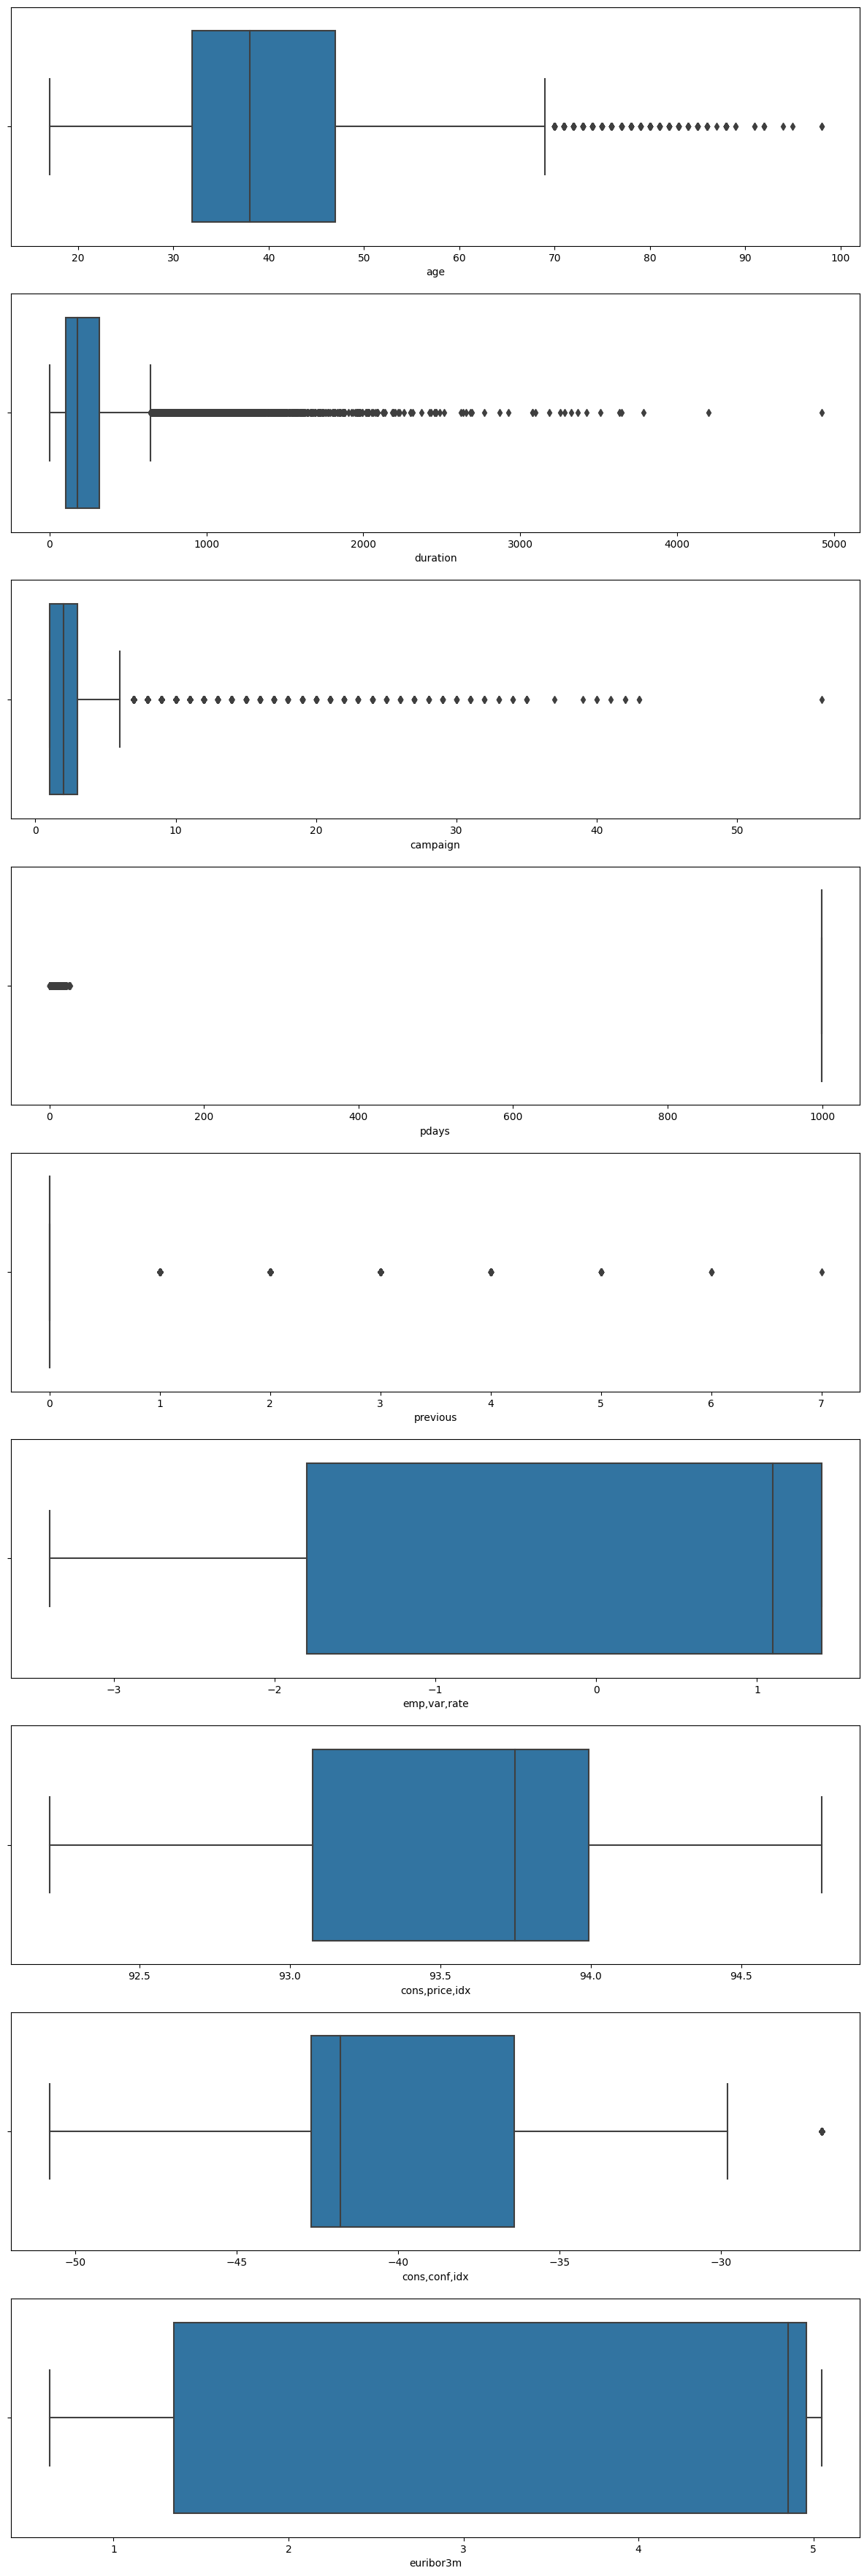

In [5]:
# obtenemos los boxplot para ver de forma rápida la presencia de outliers
fig, ax = plt.subplots(9, 1, figsize=(15,45))

for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i])
plt.show()

- Las columnas 'emp,var,rate', 'cons,price,idx', 'cons,conf,idx', 'euribor3m' no tienen outliers
- Las columnas 'age', 'duration', 'campaign' sí tienen outliers que podemos analizar.
- Las columnas 'pdays', 'previous' gráficamente parece que tengan outliers pero en realidad los valores que aparecen como típicos (999 en 'pdays' y 0 en 'previous') serían un 'No' más que un valor numérico como tal. Como ese 'No' es el valor más común (sería la moda) falsea los datos del gráfico.

2. Identifica visualmente los outliers  

- Se ha realizado en el apartado anterior

3. Identifica sobre el dataframe las filas que son outliers  

In [6]:
#obtenemos los estadísticos para poder compararlos luego
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
"emp,var,rate",41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
"cons,price,idx",41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
"cons,conf,idx",41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


In [7]:
# como no hay nulos podemos usar np.percentile()
df_num.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp,var,rate      0
cons,price,idx    0
cons,conf,idx     0
euribor3m         0
dtype: int64

In [8]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {}
    for col in lista_columnas:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < (Q1 - outlier_step)) | (dataframe[col] > (Q3 + outlier_step))]
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))   
    return outliers_data, dicc_indices # estraemos tanto el datafraame con los outliers como el diccionario con sus índices

In [9]:
# introducimos tan solo las columnas que hemos considerado que tiene sentido analizar
df_outliers, indices_outliers = detectar_outliers(df_num.columns[0:3], df)

In [10]:
# printeamos una muestra del dataframe con los outliers
df_outliers.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day_week
887,54,administrator,married,university degree,No,No,No,telephone,388,7,...,NONEXISTENT,1.1,93.994,-36.4,4.856,"5191,0",no,"'may', 'wed'",'may','wed'
1043,41,technician,single,university degree,NaN,No,No,telephone,79,8,...,NONEXISTENT,1.1,93.994,-36.4,4.856,"5191,0",no,"'may', 'wed'",'may','wed'
1094,40,technician,married,professional course,No,Si,No,telephone,253,8,...,NONEXISTENT,1.1,93.994,-36.4,4.856,"5191,0",no,"'may', 'wed'",'may','wed'
1097,51,blue-collar,married,basic 4y,NaN,Si,No,telephone,244,7,...,NONEXISTENT,1.1,93.994,-36.4,4.856,"5191,0",no,"'may', 'wed'",'may','wed'
1230,48,blue-collar,divorced,basic 4y,No,No,No,telephone,521,7,...,NONEXISTENT,1.1,93.994,-36.4,4.855,"5191,0",no,"'may', 'thu'",'may','thu'


In [11]:
# vemos cuantas filas tiene
df_outliers.shape

(2406, 22)

In [12]:
# vemos cuantos índices tenemos de outliers
set1 = set(indices_outliers["age"] + indices_outliers["duration"] + indices_outliers["campaign"])
len(set1)

5652

In [13]:
indices_outliers.keys()

dict_keys(['age', 'duration', 'campaign'])

In [14]:
print(f'''A continuación se muestran los índices de los outliers de cada columna analizada:
Columna "age": {indices_outliers["age"]}
Columna "duration": {indices_outliers["duration"]}
Columna "campaign": {indices_outliers["campaign"]}''')

A continuación se muestran los índices de los outliers de cada columna analizada:
Columna "age": [27713, 27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811, 27812, 27813, 27814, 27815, 27816, 27817, 27818, 27826, 27837, 27838, 27844, 27851, 27875, 27879, 27902, 27930, 27950, 27951, 27963, 28220, 28221, 28312, 28456, 28504, 28530, 28540, 28586, 28619, 28732, 28773, 29225, 29263, 29498, 29625, 29668, 29682, 29973, 29977, 29981, 29987, 29990, 30000, 30004, 30006, 30072, 30078, 30079, 30088, 30103, 30110, 30133, 30171, 30214, 30225, 30227, 30241, 30334, 30335, 30390, 30430, 30460, 30589, 35833, 35848, 35856, 35878, 35973, 36183, 36285, 36311, 36383, 36384, 36816, 36998, 37136, 37137, 37170, 37186, 37190, 37192, 37193, 37195, 37206, 37207, 37213, 37219, 37227, 37235, 37237, 37239, 37257, 37260, 37316, 37341, 37355, 37371, 37403, 37454, 37455, 37472, 37479, 37493, 37505, 37509, 37512, 37525, 37532, 37545, 37568, 37570, 37586, 37597, 37601, 37602, 37604, 37635, 37661, 37675, 37679, 37690,

4. Reemplaza los outliers por el estadístico más correcto.  

In [15]:
# como vemos los índices no son todos consecutivos, por lo que tendremos que hacer un reset_index para eliminarlos
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41176)

In [16]:
# ahora sí tenemos un índex autoincremental de 0 a 41176
df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=41176, step=1)

In [19]:
df_out_prev =  df.iloc[list(set1), : ]
df_out_prev

IndexError: positional indexers are out-of-bounds

In [ ]:
# reemplazamos por la mediana
for k, v in indices_outliers.items():
    mediana = df[k].median() 
    for i in v:
        df.loc[i,k] = mediana 

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.  

In [ ]:
df.to_csv('../datos/bank-additional-full4.csv')